In [1]:
import sqlite3
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder 
import textblob 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error

# Importing and general exploration of entire dataset

In [2]:
#Extract table information from using sqlite3 and place into a dataframe 
con = sqlite3.connect("home_sales.db")
df = pd.read_sql_query("SELECT * FROM sales", con)

In [3]:
#Look at the first few rows of the df to get a sense of what and how the information 
df.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
0,7787980.0,13 October 2014,221900.0,3.0,1.00,1.0,0.0,0.0,fair,10.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6774848.0,09 December 2014,538000.0,3.0,2.25,2.0,0.0,0.0,fair,7.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,6999329.0,25 February 2015,180000.0,2.0,1.00,1.0,0.0,0.0,fair,8.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,7773052.0,09 December 2014,604000.0,4.0,3.00,1.0,0.0,0.0,excellent,6.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,7760818.0,18 February 2015,510000.0,3.0,2.00,1.0,0.0,0.0,fair,6.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


From the first few rows of the dataframe it seems that majority of the columns holds numerical values except the 'date' and 'condtion' column.

### Lets move to look at the number of rows and columns in this dataset as well as the data-types of each columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21871 non-null  float64
 1   date              21925 non-null  object 
 2   price             21896 non-null  float64
 3   bedrooms          21905 non-null  float64
 4   bathrooms         21938 non-null  float64
 5   floors            21862 non-null  float64
 6   waterfront        21871 non-null  float64
 7   view              21908 non-null  float64
 8   condition         21890 non-null  object 
 9   review_score      21851 non-null  float64
 10  basement_size     21929 non-null  float64
 11  built             21853 non-null  float64
 12  renovation        21897 non-null  float64
 13  zipcode           21884 non-null  float64
 14  latitude          21903 non-null  float64
 15  longitude         21883 non-null  float64
 16  living_room_size  21912 non-null  float6

From the results it can be seen that there are a total of 23154 rows and 18 columns. There are two objects datatype which are the columns 'date' and 'condition' which will be looked into further down the EDA

It was also seen that all columns have missing or null values since all the column's rows are lesser than the total number of rows. 

### Next lets have a look at how many null values are there in each columns

In [5]:
#check to see how many null values are there in each column
df.isnull().sum()

id                  1283
date                1229
price               1258
bedrooms            1249
bathrooms           1216
floors              1292
waterfront          1283
view                1246
condition           1264
review_score        1303
basement_size       1225
built               1301
renovation          1257
zipcode             1270
latitude            1251
longitude           1271
living_room_size    1242
lot_size            1222
dtype: int64

From this information it looks like there are quite a number of null value in all the columns

### Now nets see how much rows were lost when all the null value are removed from the dataset 

In [6]:
#filtering the dataframe to contain rows that are with values only
df_new = df.drop('id',axis=1)
df_new = df.dropna()
#reset index after droping na 
df_new.reset_index(drop=True,inplace=True)
#check how much rows we lost from takeing out all of the rows with null values
percentage_loss = round((len(df)-len(df_new))/len(df) *100)
print('The pecentage loss was ',percentage_loss,'%')


The pecentage loss was  15 %


15% seems quite alright as I do not want to risk filling the na values with other values like mean since each house is unique and it is not fair to actually put the mean value for example the number of bedrooms to a house with unknow bedroom.

### Next we will see how the float data types mean,std,max and min values to further inverstigate if there are any unusual or werid value

In [7]:
df_new.describe()

,id,price,bedrooms,bathrooms,floors,waterfront,view,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
count,1.968800e+04,1.968800e+04,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000,19688.000000
mean,7.394051e+06,5.434626e+05,3.371495,2.115553,1.495175,0.008178,0.235575,7.657964,292.394453,1970.972064,86.568417,98078.000762,47.561199,-122.213786,1988.706217,12846.990807
std,3.895133e+05,3.733997e+05,0.904515,0.771053,0.540391,0.090062,0.769438,1.177340,444.848677,29.378149,406.561830,53.452090,0.138121,0.140946,686.733246,27567.625277
min,6.721618e+06,7.500000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,399.000000,651.000000
25%,7.058383e+06,3.230000e+05,3.000000,1.750000,1.000000,0.000000,0.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.473000,-122.328000,1490.000000,5100.000000
50%,7.389222e+06,4.520000e+05,3.000000,2.250000,1.500000,0.000000,0.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.573050,-122.231000,1840.000000,7620.000000
75%,7.729408e+06,6.500000e+05,4.000000,2.500000,2.000000,0.000000,0.000000,8.000000,560.000000,1997.000000,0.000000,98118.000000,47.678600,-122.125000,2370.000000,10089.500000
max,8.071385e+06,7.700000e+06,11.000000,8.000000,3.500000,1.000000,4.000000,13.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From the results it can be seen that most of the  min and max and different percentile like 25%,50%,75% are seemly okay except number of bathrooms where the 25% consist of 1.75 number of bathrooms? similarly 50% and 75% with 2.25 and 2.5 number of bathroom?

This seems werid as it is expected to be whole number since it should represent the number of bathrooms in a house have and 2.25 or 1.75 does not make sense to be a value for the number of bathroom in a given house.

# Exploring and cleaning up 'bathrooms' column

In [8]:
# looking deeper into bathrooms section by first seeing the different unique values in the bathrooms columns

df_new['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 5.25, 6.  , 1.25, 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 0.5 , 6.25, 6.5 ])

From the results it can be seen that there are decimal numbers all around like 0.75,5.5,4.25...etc hence cleaning will have to be done for this column since the values does not make sense

In [9]:
# Therefore rounding of all the values to a whole number will be done for the column of bathrooms

df_new['bathrooms'] = df_new.bathrooms.apply(lambda x : round(x))

#dobule check the new bathroom column value to ensure that it only contains whole number 

df_new['bathrooms'].unique()


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 2, 3, 4, 5, 0, 6, 7, 8], dtype=int64)

Results showed that the float value now changed to int and it no longer consist of the decimal values.

# Exploring and cleaning up 'date' column and coverting to datetime

In [10]:
#Next we will move on to converting the date to a datetime series instead of it just as an object datatype
#But first lets explore the unique values in 'date' column 
df_new.date.unique()

array(['13 October 2014', '09 December 2014', '25 February 2015',
       '18 February 2015', '12 May 2014', '27 June 2014',
       '15 January 2015', '15 April 2015', '12 March 2015',
       '03 April 2015', '27 May 2014', '07 October 2014',
       '24 January 2015', '31 July 2014', '29 May 2014',
       '05 December 2014', '24 April 2015', '14 May 2014', '03 July 2014',
       '16 May 2014', '20 November 2014', '03 November 2014',
       '26 June 2014', '01 December 2014', '24 June 2014',
       '02 March 2015', '10 November 2014', '03 December 2014',
       '13 June 2014', '28 May 2014', '30 December 2014',
       '13 February 2015', '20 June 2014', '11 Auust 2014',
       '28 October 2014', '29 July 2014', '18 July 2014', '25 March 2015',
       '28 April 2015', '11 March 2015', '16 September 2014',
       '17 February 2015', '31 December 2014', '05 February 2015',
       '03 March 2015', '19 August 2014', '07 April 2015',
       '27 August 2014', '23 February 2015', '10 December 20

Looking the the resulting unique strings values it can be seen that there are many spelling errors like 'arch','my','uly','dcember','octber' etc...
These spelling mistake will make it impossible to convert it to date time series since there are many months are spelt wrongly

### Before moving on to clean the data lets see how many months are spelled wrongly but we need to remove all of the digit and whitespaces and add it to a new column called 'month'

In [11]:
# Removal of all whitespaces and digits and assigning it to a new column called 'month'
df_new['month'] = df_new['date'].str.replace('[\d]','').str.strip()

#Check if the new month contains all the different month
print(df_new['month'].unique())


['October' 'December' 'February' 'May' 'June' 'January' 'April' 'March'
 'July' 'November' 'Auust' 'September' 'August' 'Feburary' 'My' 'Novemer'
 'ugust' 'Augut' 'arch' 'Juy' 'Sptember' 'Decembr' 'ecember' 'Jul' 'Jne'
 'Febuary' 'Januar' 'pril' 'ay' 'Apri' 'Setember' 'Noember' 'Dcember'
 'uly' 'Augus' 'Deceber' 'Decmber' 'une' 'Octobe' 'ovember' 'Septemer'
 'Novembr' 'Jnuary' 'ebruary' 'Ma' 'Janury' 'Jue' 'Jauary' 'eptember'
 'Jly' 'Sepember' 'Feruary' 'Marh' 'Jun' 'Marc' 'Aprl' 'Augst' 'Mrch'
 'Apil' 'Septeber' 'Octobr']


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now from this it is clear that all digits and white spaces were removed leaving only the month spelling.

### So now we can move on to look at how many months are spelled wrongly

In [12]:
#look at how many mispelled months in the column
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_new['month'].value_counts())

May          2184
April        2036
July         2020
June         1964
August       1747
October      1715
March        1708
September    1579
December     1316
November     1289
February      999
January       910
Feburary      126
ay              7
Jue             4
Jun             4
Novemer         4
My              4
Ma              4
une             3
Dcember         3
Novembr         3
Jul             3
ovember         3
Augut           3
Augus           3
ugust           3
pril            3
Jauary          2
Aprl            2
Jne             2
ecember         2
Janury          2
Apri            2
uly             2
Juy             2
Januar          1
Decembr         1
Noember         1
Febuary         1
Octobr          1
Marh            1
Augst           1
Jnuary          1
Octobe          1
Deceber         1
Marc            1
Septemer        1
Sptember        1
Jly             1
eptember        1
Auust           1
arch            1
Apil            1
Setember        1
Decmber   

From the information above it can be seen that there are around 200 months entries mispelled while majority of the months are spelled correctly. 

###  A total of around 200 mispelled months entries seems quite alot, lets try to savage the mispelled word using textblob to help try correct the the mispelled words

In [13]:
az = df_new.month.apply(lambda txt: ''.join(textblob.TextBlob(txt).correct()))

#check now to see how much did the spelling corrector help to improve the spelling 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(az.value_counts())

May          2184
April        2036
July         2020
June         1964
August       1750
October      1717
March        1708
September    1582
December     1318
November     1296
February     1127
January       914
ay              7
Member          5
A               4
By              4
Due             4
Run             4
april           3
une             3
november        3
august          3
Ought           3
But             3
december        2
Remember        2
Peri            2
july            2
Girl            2
One             2
Buy             2
Must            2
Angry           2
arch            1
Are             1
Arc             1
Soil            1
september       1
february        1
Fly             1
Arch            1
Name: month, dtype: int64


From the result above it can be seen that majority of the spelling are corrected however it was noted that there were some months that spelt correctly but is not capitalized in front hence resutling it to be seperated from the rest.

#### Therefore to treat this issue lets capitalise all the first word and see how it goes:

In [14]:
az = az.str.capitalize()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(az.value_counts())

#lets assign this new data to replace the older data from the 'month' column
df_new['month']= az

May          2184
April        2039
July         2022
June         1964
August       1753
October      1717
March        1708
September    1583
December     1320
November     1299
February     1128
January       914
Ay              7
Member          5
A               4
By              4
Due             4
Run             4
But             3
Ought           3
Une             3
Must            2
Arch            2
Angry           2
Buy             2
Remember        2
One             2
Girl            2
Peri            2
Fly             1
Are             1
Arc             1
Soil            1
Name: month, dtype: int64


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


From this results it can be seen that those month spelled correctly are now correctly placed together with other months and the number of mispelled word dropped from close to 200 to around 50.

### Now lets move on to remove those rows with mispelled months in the dataframe

In [15]:
list_of_date = ['May','April','July','June','August','October','March','September','December','November','February','January']
df_new = df_new[df_new['month'].isin(list_of_date)]

#check that month columns only contain the rightly spelled months
df_new.month.unique()

array(['October', 'December', 'February', 'May', 'June', 'January',
       'April', 'March', 'July', 'November', 'September', 'August'],
      dtype=object)

From the results we can see that the new dataframe now contains only rows with the rightly spelled months

### Next we will be looking to add the day and year back into the month but first we will need to extract the year and day then join it with the month and then place it into a new column

In [16]:
#extracting the year from the date column and placing it into a new column called 'year'

df_new['year'] = df_new.date.apply(lambda txt: ''.join(txt[-4:]))

#extracting the day from the date column and placing into a new column called 'day'
df_new['day'] = df_new.date.apply(lambda txt: ''.join(txt[:2]))

# joining the day month and year string togther and placing it into a new column called 'month_year'
df_new['month_year'] = df_new[['day','month','year']].apply(lambda x : ' '.join(x),axis=1)

#check if month_year had got all details of day,month and year 
df_new['month_year'].head()



0     13 October 2014
1    09 December 2014
2    25 February 2015
3    09 December 2014
4    18 February 2015
Name: month_year, dtype: object

From the result above it can be seen that month_year columns now contains all the necessary data to be converted to datetime datatype

### Now lets convert columns of 'day','month','year' and 'month_year' to get their respective values 

In [17]:
#converting columns of 'day','month','year' and 'month_year' to get datetime 

df_new['month_year']=pd.to_datetime(df_new['month_year'],format='%d %B %Y')
df_new['month']=pd.to_datetime(df_new['month'],format='%B').dt.month
df_new['day']=pd.to_datetime(df_new['day'],format='%d').dt.day
df_new['year']=pd.to_datetime(df_new['year'],format='%Y').dt.year

# check if month_year became datetime series and month,day and year becomes interg
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19631 entries, 0 to 19687
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                19631 non-null  float64       
 1   date              19631 non-null  object        
 2   price             19631 non-null  float64       
 3   bedrooms          19631 non-null  float64       
 4   bathrooms         19631 non-null  int64         
 5   floors            19631 non-null  float64       
 6   waterfront        19631 non-null  float64       
 7   view              19631 non-null  float64       
 8   condition         19631 non-null  object        
 9   review_score      19631 non-null  float64       
 10  basement_size     19631 non-null  float64       
 11  built             19631 non-null  float64       
 12  renovation        19631 non-null  float64       
 13  zipcode           19631 non-null  float64       
 14  latitude          1963

So from the results it can be seen all the changes was successfully

# Exploring and cleaning up 'condition' column

In [18]:
#check all the unique values in the condition tab
df_new.condition.value_counts()

fair         11755
good          4729
excellent     1392
FAIR           994
GOOD           437
poor           140
EXCELLENT      139
terrible        29
POOR            14
TERRIBLE         2
Name: condition, dtype: int64

From the results it seems like smiliar rating are seperated due to capital letter and small letter e.g fair and FAIR)

### So now lets covert all strings to lower case so all same rating will be counted as the same

In [19]:
#convert all strings in condtion column to lower case 
df_new['condition']=df_new.condition.apply(lambda x : x.lower())
#check if all words are changed to lower case and if all same word are counted as the same 
df_new.condition.value_counts()


fair         12749
good          5166
excellent     1531
poor           154
terrible        31
Name: condition, dtype: int64

From the results it can be seen that all words are in lower case and same words are counted as same.

### Now lets convert 'condition' values into numerical value so that it can be checked for correlation 

In [20]:
# change it to datatype of 'condition' column to categorical 
#changing condition to caterogical factor so that it will sort the string in correct order 

df_new['condition']=pd.Categorical(df_new['condition'],categories=['excellent','good','fair','poor','terrible'],ordered=True)

#encode catergorcial condition column
lencoder = LabelEncoder()
df_new['condition'] = lencoder.fit_transform(df_new['condition'])

#check for what classes are used to encode 
print(lencoder.classes_)
#check if the encoding works and is placed in dataframe
df_new.condition.head(10)

['excellent' 'fair' 'good' 'poor' 'terrible']


0    1
1    1
2    1
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: condition, dtype: int32

From the results above it is clear that the we had successfully encode the 'condition' string values to numerical values

# Doing EDA of the clean up data by using pearson correlation 

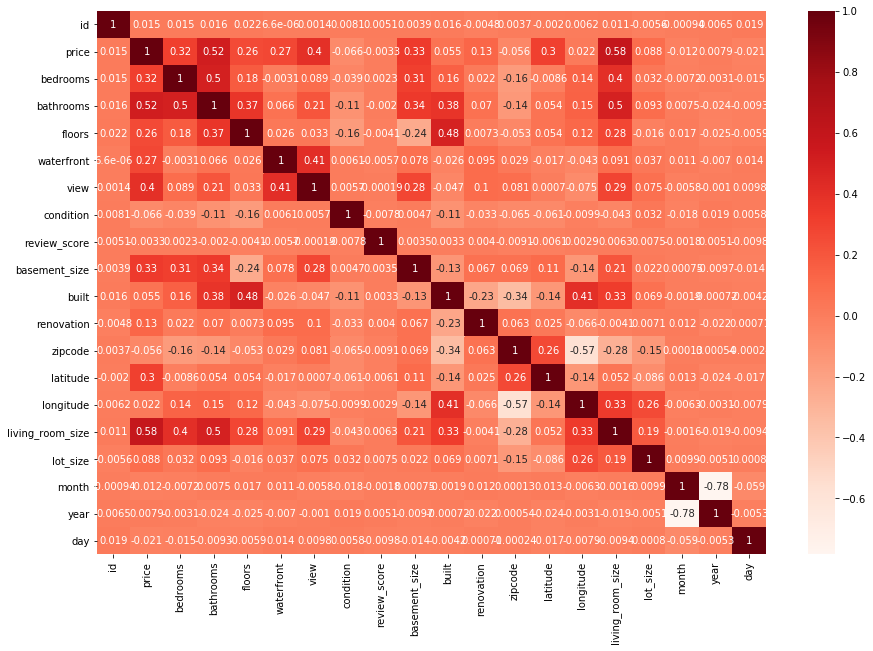

In [21]:
import seaborn as sns

#ploting a heat map to see the correlaton between all features 
correlation = df_new.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.show()


In [22]:
#Correlation with output variable
cor_target = abs(correlation["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

price               1.000000
bathrooms           0.520507
living_room_size    0.582352
Name: price, dtype: float64

From the results we can see that out of all the features only no. of bathrooms and living room size is highly  correlated to price but we also need to make sure that bathrooms and livingroom size is not highly correlated to one another hence we will have to visually check

In [23]:
#checking if bathroom and living room size are correlated if so then can just keep on factor

print(df_new[['bathrooms','living_room_size']].corr())


                  bathrooms  living_room_size
bathrooms          1.000000          0.495581
living_room_size   0.495581          1.000000


From results it can be seen that bathrooms and living_room_size are both quite corelated hence can either choose one feature.

However this is just a filtering method and might not be the best way to get the best accuracy for model in machine learning hence we will next use a few other methods to see how many features are best to get the best accuracy 

# Usage of LassoCV and RFE method(linear) and Random Forest Regressor(able to address non-linearily) to look for top features with best accuracy for machine learning

### First lets look at all the datatypes of the cleaned data 

In [24]:
print(df_new.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19631 entries, 0 to 19687
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                19631 non-null  float64       
 1   date              19631 non-null  object        
 2   price             19631 non-null  float64       
 3   bedrooms          19631 non-null  float64       
 4   bathrooms         19631 non-null  int64         
 5   floors            19631 non-null  float64       
 6   waterfront        19631 non-null  float64       
 7   view              19631 non-null  float64       
 8   condition         19631 non-null  int32         
 9   review_score      19631 non-null  float64       
 10  basement_size     19631 non-null  float64       
 11  built             19631 non-null  float64       
 12  renovation        19631 non-null  float64       
 13  zipcode           19631 non-null  float64       
 14  latitude          1963

From the above information it seems like  'date' and 'month_year' column is not needed since it is still an object and date_time series which could not be processed using machine learning algorithms therefore we will remove it.

### Let go with the droping of these columns now 

In [25]:
df_new.drop(['date','month_year'],axis=1,inplace=True)
print('df_new after dropping date\n')
print(df_new.info())


df_new after dropping date

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19631 entries, 0 to 19687
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                19631 non-null  float64
 1   price             19631 non-null  float64
 2   bedrooms          19631 non-null  float64
 3   bathrooms         19631 non-null  int64  
 4   floors            19631 non-null  float64
 5   waterfront        19631 non-null  float64
 6   view              19631 non-null  float64
 7   condition         19631 non-null  int32  
 8   review_score      19631 non-null  float64
 9   basement_size     19631 non-null  float64
 10  built             19631 non-null  float64
 11  renovation        19631 non-null  float64
 12  zipcode           19631 non-null  float64
 13  latitude          19631 non-null  float64
 14  longitude         19631 non-null  float64
 15  living_room_size  19631 non-null  float64
 16  lot_size    

Now from the information it is clear that all of the unwanted columns are dropped 

### Now we can move on to scaling the features data values for standardisation purposes before moving on to trying out prototype model 

In [26]:

from sklearn.preprocessing import StandardScaler 
#defining X and y 
y=df_new['price']
X= df_new.drop('price',axis=1)
#scaling the X data 
scaler = StandardScaler()
scaled_X= scaler.fit_transform(X.values)

Now that all the features data values are scaled we can now look at the various method and model to search for top features that is suitable for machine learning 

# LassoCV Method 

Root Mean Squared Error is : 232047.6470482954
Best score/r2 using built in LassoCV 0.594799
Lasso picked 19 variables and removed 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

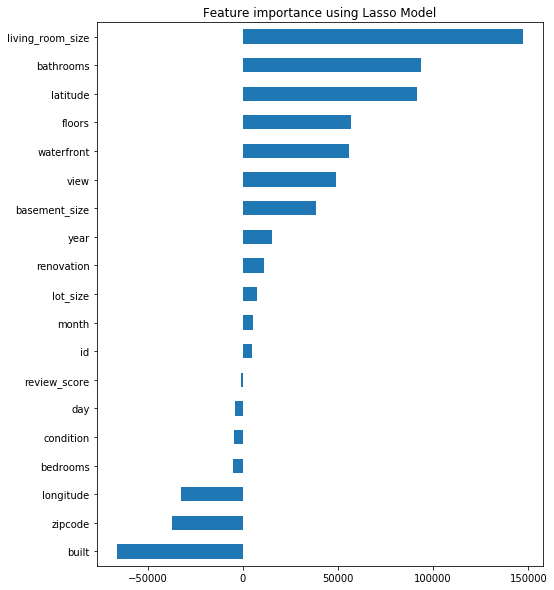

In [27]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
X_train0,X_test0,y_train0,y_test0 = train_test_split(scaled_X,y,test_size=0.2,random_state=42)
lasz = LassoCV()
lasz.fit(X_train0,y_train0)
y_pred0=lasz.predict(X_test0)
coef = pd.Series(lasz.coef_ , index=X.columns )
rsme0 = np.sqrt(mean_squared_error(y_test0,y_pred0))
print('Root Mean Squared Error is :', rsme0)
print("Best score/r2 using built in LassoCV %f" %lasz.score(scaled_X,y))
print("Lasso picked " + str(sum(coef !=0)) + ' variables and removed ' + str(sum(coef == 0))+ ' variables')


# to get sort important features
import matplotlib 

impt_feature = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
impt_feature.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


From this it can be seen that LassoCV chose to keep all the feature to get a good accuracy. But from this it can be seen that id,lot_size,month,review_score,condition and day is the least infulencial features on the model. With living room and bathrooms the most infulencial and that is similar to our pearson correlation result on the most important factor. But the R2 is quite low around 0.59 and RSME of 232047.6.

# RFE Method 

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# define number of features 

n_features = np.arange(1,19)
best_score = 0 
# To store best features 
best_number_features = 0
score_list = []
#using a loop to loop through all number of features from 1 features all the way to 19 features 
for i in range (len(n_features)):
    modelz = LinearRegression()
    rfe =RFE(estimator=modelz,n_features_to_select = n_features[i])
    X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.2,random_state=42)
    rfe.fit(X_train,y_train)
    X_train_rfe= rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    modelz.fit(X_train_rfe,y_train)
    score = modelz.score(X_test_rfe,y_test)
    score_list.append(score)
    if score > best_score:
        best_score=score
        best_number_features=n_features[i]
print('Optimal number of features: %d' %best_number_features)
print('score/r2 with %d features: %f' %(best_number_features,best_score))
        

Optimal number of features: 12
score/r2 with 12 features: 0.597355


Since the opitmal number of features is 12 as indicated by RFE 

Lets see how is the what are the 12 features selected and also the Root Mean Square Error vlaue 

In [29]:

cols=list(X.columns)
model = LinearRegression()
rfe =RFE(model,12)

#Tranforming the data using RFE

# X_rfe = rfe.fit_transform(scaled_X,y)
X_train_rfe= rfe.fit_transform(X_train,y_train)
X_test_rfe = rfe.transform(X_test)
     
#fitting model to transformed data
model.fit(X_train_rfe,y_train)
y_pred = model.predict(X_test_rfe)
rsme = np.sqrt(mean_squared_error(y_test,y_pred))
holder = pd.Series(rfe.support_,index=cols)
selected_features = holder[holder == True].index
print('Root Mean Squared Error is :', rsme)
print(selected_features)

Root Mean Squared Error is : 231911.38151768033
Index(['bathrooms', 'floors', 'waterfront', 'view', 'basement_size', 'built',
       'renovation', 'zipcode', 'latitude', 'longitude', 'living_room_size',
       'year'],
      dtype='object')


Similar to LassoCV the features that are not really influential for LinearReggression which were also  id,lot_size,month,review_score,condition and day were not part of the feature selected using RFE. It was also noted that LinearRegression model with the most optimal number of features had a R2 of 0.597 and RSME of 231991.4 which were very close to LassoCV model which uses all 19 features.

This low R2 produced by both linear models showed that linear model does not really do so well for this dataset hence suggesting possilbity of non-linearity. 

### Lets Move on to looking at models that could address non-linear dataset or pattern 

# Random Forest Regressor ( able to address non-linearity)

In [30]:
from sklearn.ensemble import RandomForestRegressor

model_1 = RandomForestRegressor()
model_1.fit(X_train,y_train)
model_1.predict(X_test)
y_pred_1 = model_1.predict(X_test)
rsme1_0 = np.sqrt(mean_squared_error(y_test,y_pred_1))
print('Root Mean Squared Error is :', rsme1_0)
print("Score using RandomForestRegressor with all 19 features is %f" %model_1.score(X_test,y_test))

Root Mean Squared Error is : 155714.8839426359
Score using RandomForestRegressor with all 19 features is 0.818474


([<matplotlib.axis.YTick at 0x28ee6f07d08>,
 <a list of 19 Text yticklabel objects>)

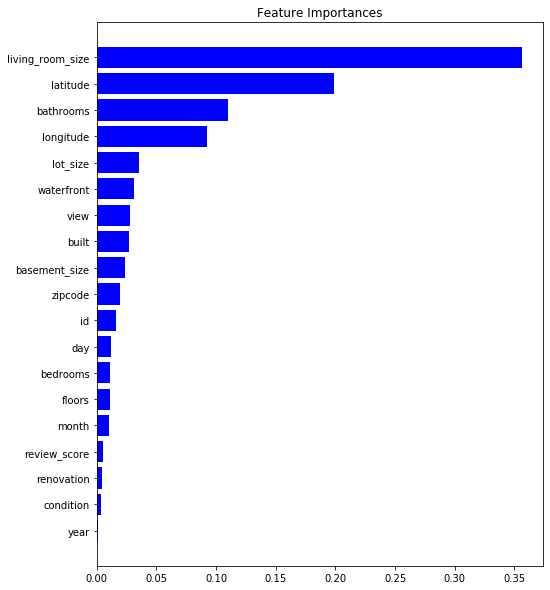

In [31]:
features = X.columns
importances = model_1.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])

So from this results it can be seen that there is indeed some non-linearity since Random Forest Regressor is able to produce a much better accuracy of 0.82 and a relatively lower RSME of 154221 as compared to the linear models.

Looking at the importance graph, it can be seen that there are quite alot of features that do not infulence the model much hence as it is best to always have a simipler model with lesser feature we will go ahead and remove these non-influential features. 

### Lets try to just take the top 6 features and see if the model is still good to go 

In [32]:
# now try to remove the 13 least important factors,leaving the top 6 features
X_RFR = X[['living_room_size','latitude','bathrooms','longitude','lot_size','waterfront']]
X_RFR_scaled = scaler.fit_transform(X_RFR.values)
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_RFR_scaled,y,test_size=0.2,random_state=42)
model_2 = RandomForestRegressor()
model_2.fit(X_train1,y_train1)
y_pred1 = model_2.predict(X_test1)
rsme1 = np.sqrt(mean_squared_error(y_test,y_pred1))
print('Root Mean Squared Error is :', rsme1)
print("Score using new RandomForestRegressor with top 6 features is %f" %model_2.score(X_test1,y_test1))

Root Mean Squared Error is : 162181.6657274022
Score using new RandomForestRegressor with top 6 features is 0.803084


From the results of the Random Forest Regressor using the top 6 features showed that the accuracy only dropped slightly and also a slight increase in RSME hence showing that the top 6 feature could represent the price well. Hence we will go with it  

# Conclusion 

Therefore from the results obtained using LassoCV and RFE we can see that a total of 12- 19 features are needed to get the best accuracy from a linear machine learning model while using filtering method it was clear that number of bathrooms and living room size were the most correlated to price of the house. The high correlation of the bathrooms and living room size were also shown in the LassoCV plot. Therefore to get a good sense of what is correlates well with price a simple filtering is good enough but to get the best number of feature for a good machine learning prediction other method like LassoCV and RFE would have to be used.

Overall it seems that the usage of RandomForestRegressor seems to provide the highest accuracy of 0.81 and lower RSME of 160584.7 as compared to linearRegressor with around 0.60 at best with RSME of 231911.3. This shows that data has some non-linearity which could not be addressed by a simple linearRegressor but a RandomForestRegresssor is able to. Therefore RandomForestRegressor along with the top 6 features will be used for machine learning.